In [1]:
#view data
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-2025-fall-monsenca/Motor_Vehicle_Collisions_-_Crashes.csv.crdownload') # load the data from s3
df.head() #show the top 5 rows

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373.0,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


I used head to view my data so it shows the first 5 rows. There are 5 rows and 29 columns. There are both numeric and text columns. As a first impression, I see a lot of missing values in several different columns so those will need to be handled.

In [3]:
df.shape

(1141419, 29)

In [4]:
#rename columns
df = df.rename(columns={"CRASH DATE": "Date"})
df.head()

,Date,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373.0,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Date                                   0
CRASH TIME                             0
BOROUGH                           401793
ZIP CODE                          401983
LATITUDE                           83292
LONGITUDE                          83292
LOCATION                           83292
ON STREET NAME                    287041
CROSS STREET NAME                 591298
OFF STREET NAME                   855578
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              30
NUMBER OF PEDESTRIANS INJURED          1
NUMBER OF PEDESTRIANS KILLED           1
NUMBER OF CYCLIST INJURED              1
NUMBER OF CYCLIST KILLED               1
NUMBER OF MOTORIST INJURED             1
NUMBER OF MOTORIST KILLED              1
CONTRIBUTING FACTOR VEHICLE 1       4732
CONTRIBUTING FACTOR VEHICLE 2     208109
CONTRIBUTING FACTOR VEHICLE 3    1053060
CONTRIBUTING FACTOR VEHICLE 4    1120210
CONTRIBUTING FACTOR VEHICLE 5    1135364
COLLISION_ID                           1
VEHICLE TYPE COD

In [6]:
df = df[['Date', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']] 

In [7]:
df.isnull().sum()

Date                                  0
CRASH TIME                            0
BOROUGH                          401793
ZIP CODE                         401983
LATITUDE                          83292
LONGITUDE                         83292
ON STREET NAME                   287041
CROSS STREET NAME                591298
OFF STREET NAME                  855578
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             30
NUMBER OF PEDESTRIANS INJURED         1
NUMBER OF PEDESTRIANS KILLED          1
NUMBER OF CYCLIST INJURED             1
NUMBER OF CYCLIST KILLED              1
NUMBER OF MOTORIST INJURED            1
NUMBER OF MOTORIST KILLED             1
CONTRIBUTING FACTOR VEHICLE 1      4732
CONTRIBUTING FACTOR VEHICLE 2    208109
COLLISION_ID                          1
VEHICLE TYPE CODE 1               10245
VEHICLE TYPE CODE 2              291704
dtype: int64

In [8]:
df.isnull().sum()

Date                                  0
CRASH TIME                            0
BOROUGH                          401793
ZIP CODE                         401983
LATITUDE                          83292
LONGITUDE                         83292
ON STREET NAME                   287041
CROSS STREET NAME                591298
OFF STREET NAME                  855578
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             30
NUMBER OF PEDESTRIANS INJURED         1
NUMBER OF PEDESTRIANS KILLED          1
NUMBER OF CYCLIST INJURED             1
NUMBER OF CYCLIST KILLED              1
NUMBER OF MOTORIST INJURED            1
NUMBER OF MOTORIST KILLED             1
CONTRIBUTING FACTOR VEHICLE 1      4732
CONTRIBUTING FACTOR VEHICLE 2    208109
COLLISION_ID                          1
VEHICLE TYPE CODE 1               10245
VEHICLE TYPE CODE 2              291704
dtype: int64

I renamed the CRASH DATE column to Date to shorten it. There were thousands of missig values. In some columns there were almost as many missing values as values so I did not drop them as that would have deleted the entire table.

In [10]:
df['LONGITUDE']

0                 NaN
1                 NaN
2          -73.970024
3                 NaN
4                 NaN
              ...    
1141414    -74.025734
1141415   -201.237060
1141416    -73.811730
1141417    -73.856260
1141418    -73.922820
Name: LONGITUDE, Length: 1141419, dtype: float64

In [11]:
sorted_df = df.sort_values(by="LONGITUDE")
display(sorted_df)

,Date,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
1122632,02/16/2017,18:30,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,3616997.0,Sedan,Taxi
1033916,06/11/2017,14:30,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,3688891.0,Sedan,Sedan
947051,11/19/2017,12:30,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Passing or Lane Usage Improper,Unspecified,3793790.0,Sedan,Station Wagon/Sport Utility Vehicle
892927,02/17/2018,18:50,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Unspecified,Unspecified,3849177.0,Taxi,Sedan
911103,01/14/2018,6:45,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Alcohol Involvement,Driver Inattention/Distraction,3829449.0,Sedan,Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141282,01/07/2017,13:30,NaN,NaN,NaN,NaN,BROOKVILLE BOULEVARD,ROCKAWAY BOULEVARD,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Unspecified,Unspecified,3593523.0,Sedan,Sedan
1141308,01/12/2017,11:30,NaN,NaN,NaN,NaN,SHORE PARKWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,3596805.0,Sedan,Station Wagon/Sport Utility Vehicle
1141317,12/30/2016,21:15,NaN,NaN,NaN,NaN,CITY ISLAND RD,PELHAM BRIDGE RD,NaN,1.0,...,0.0,0.0,0.0,1.0,0.0,Failure to Yield Right-of-Way,Unspecified,3589653.0,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
1141326,12/30/2016,9:00,NaN,NaN,NaN,NaN,ASTORIA BOULEVARD,49 STREET,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Brakes Defective,Unspecified,3589302.0,Sedan,Taxi


In [12]:
display(sorted_df.iloc[5:10])

,Date,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
1110108,03/04/2017,18:30,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,3626730.0,Sedan,Station Wagon/Sport Utility Vehicle
1054270,05/29/2017,9:28,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,3680090.0,Sedan,Station Wagon/Sport Utility Vehicle
910436,01/04/2018,10:46,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Unsafe Speed,Unspecified,3822610.0,Dump,Station Wagon/Sport Utility Vehicle
905624,01/19/2018,16:32,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Unspecified,Unspecified,3832438.0,Sedan,Sedan
976497,10/13/2017,22:00,NaN,NaN,40.75837,-201.23706,QUEENSBORO BRIDGE UPPER ROADWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,3770138.0,Station Wagon/Sport Utility Vehicle,Sedan


In [13]:
sorted_filtered = df.sort_values(by="LONGITUDE")
display(sorted_filtered[sorted_filtered["LONGITUDE"] > -50])

,Date,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
1080594,05/15/2017,18:40,NaN,NaN,40.556175,-47.209625,WEST SHORE EXPRESSWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Unspecified,Unspecified,3672194.0,Sedan,Sedan
1113708,03/03/2017,0:00,NaN,NaN,40.556175,-47.209625,WEST SHORE EXPRESSWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Reaction to Uninvolved Vehicle,NaN,3625066.0,Station Wagon/Sport Utility Vehicle,NaN
972393,10/14/2017,8:30,NaN,NaN,40.556175,-47.209625,WEST SHORE EXPRESSWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,3772990.0,Sedan,NaN
1025477,07/13/2017,15:45,NaN,NaN,40.665226,-32.768513,NASSAU EXPRESSWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,3710587.0,Box Truck,Station Wagon/Sport Utility Vehicle
783385,06/23/2018,3:10,NaN,NaN,40.665226,-32.768513,NASSAU EXPRESSWAY,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Reaction to Uninvolved Vehicle,NaN,3927302.0,Sedan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034171,06/15/2017,14:30,MANHATTAN,10026.0,0.000000,0.000000,8 AVENUE,WEST 119 STREET,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,3691402.0,Sedan,Pick-up Truck
958435,10/16/2017,11:40,QUEENS,11356.0,0.000000,0.000000,129 STREET,20 AVENUE,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Passing Too Closely,Unspecified,3770703.0,Box Truck,Tow Truck / Wrecker
263,09/11/2021,4:10,MANHATTAN,10033.0,0.000000,0.000000,WEST 181 STREET,FORT WASHINGTON AVENUE,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,4456191.0,Station Wagon/Sport Utility Vehicle,Sedan
314340,03/22/2024,15:30,BRONX,10454.0,0.000000,0.000000,NaN,NaN,228 WILLIS AVENUE,0.0,...,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,Unspecified,4714097.0,Sedan,Sedan


In [14]:
#C. I selected and sorted the longitude column in order to put the variable in more of a locational order. I then filtered the same column in order to show only crashes that happened on a certain longitudinal point.

In [15]:
crash_summary = df.groupby(["CRASH TIME", "BOROUGH"]).size().reset_index(name="count")
print(crash_summary.head())

  CRASH TIME        BOROUGH  count
0       0:00          BRONX   2332
1       0:00       BROOKLYN   4220
2       0:00      MANHATTAN   2173
3       0:00         QUEENS   3026
4       0:00  STATEN ISLAND    305


Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Total Crashes by Borough'}, xlabel='Borough', ylabel='Number of Crashes'>

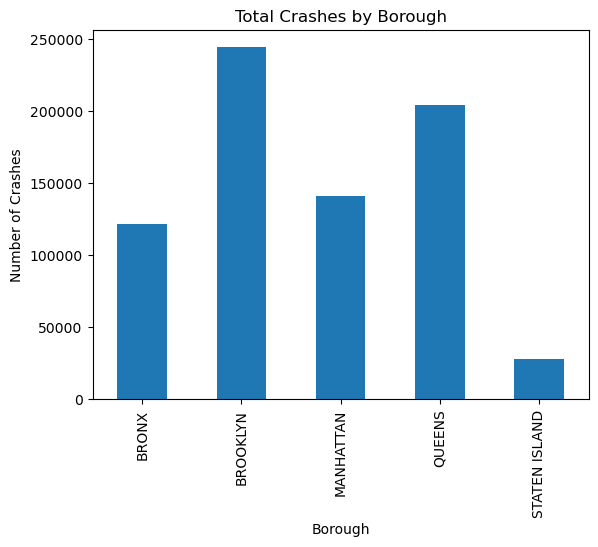

In [16]:
crash_summary.groupby("BOROUGH")["count"].sum().plot(
    kind="bar",
    title="Total Crashes by Borough",
    ylabel="Number of Crashes",
    xlabel="Borough"
)

<Axes: title={'center': 'Total Crashes by Borough'}, xlabel='Borough', ylabel='Number of Crashes'>

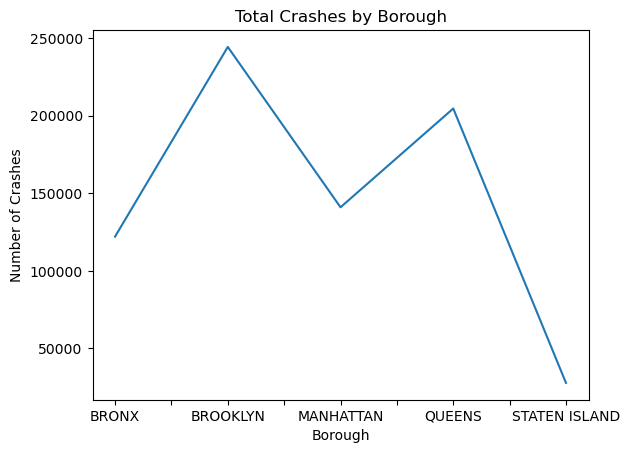

In [17]:
crash_summary.groupby("BOROUGH")["count"].sum().plot(
    kind="line",
    title="Total Crashes by Borough",
    ylabel="Number of Crashes",
    xlabel="Borough"
)

For plot 1 I used a bar chart to show how many crashes happened in each borough in this time period. It is a straight forward chart that shows Brooklyn leading in crashes by far. Staten Island has the least amount opf crashes, being more than 3 time lower than the secon lowest Borough (Bronx).

For plot 2 I used the same data in a line graph in order to better show the relation of the boroughs rather than just the totals. Now the data gives a better representation of how the Boroughs differ in crash amounts.